In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load Dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\cab_rides.csv")
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [6]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [7]:
df.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [8]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

## Univariate Analysis

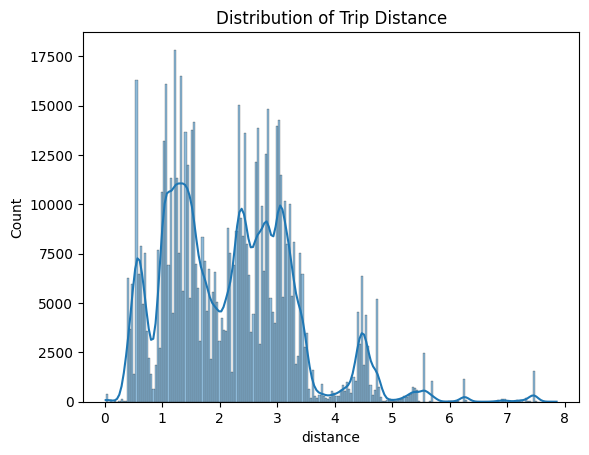

In [11]:
sns.histplot(df['distance'], kde=True)
plt.title('Distribution of Trip Distance')
plt.show()

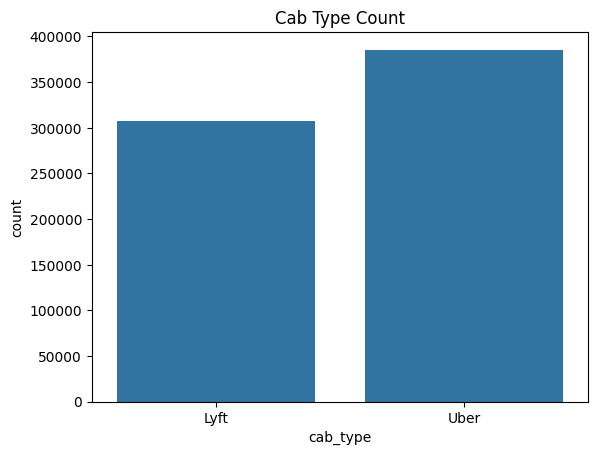

In [12]:
sns.countplot(data=df, x='cab_type')
plt.title('Cab Type Count')
plt.show()

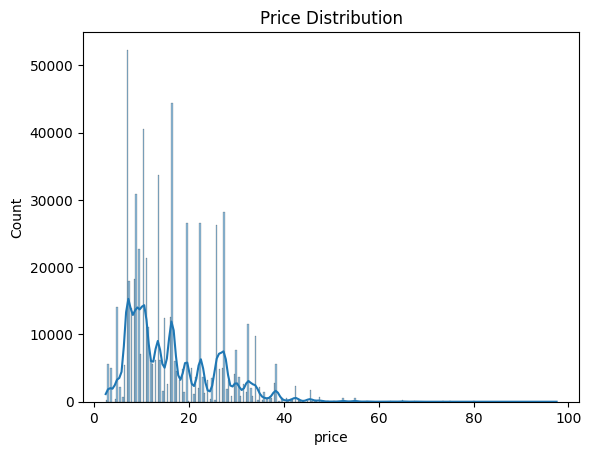

In [13]:
sns.histplot(df['price'].dropna(), kde=True)
plt.title('Price Distribution')
plt.show()

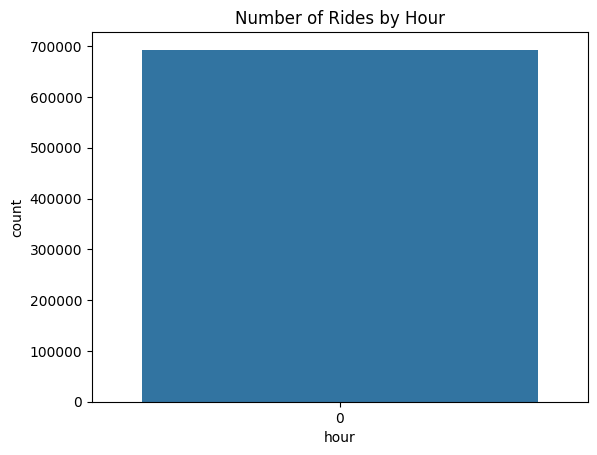

In [25]:
sns.countplot(data=df, x='hour')
plt.title('Number of Rides by Hour')
plt.show()

In [14]:
# Time-based analysis - convert timestamp
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df['hour'] = df['time_stamp'].dt.hour
df['day'] = df['time_stamp'].dt.dayofweek

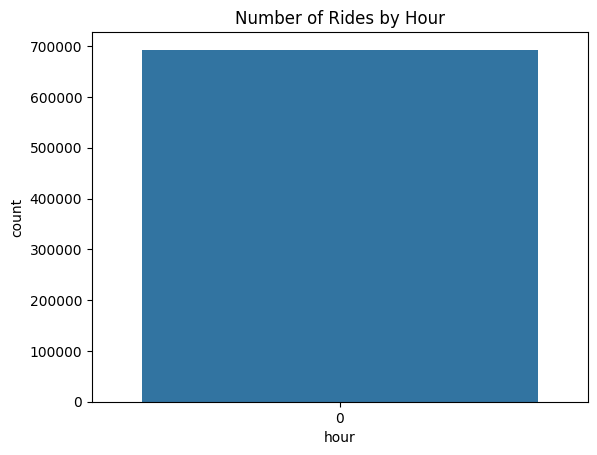

In [15]:
sns.countplot(x='hour', data=df)
plt.title('Number of Rides by Hour')
plt.show()

## Bivariate Analysis

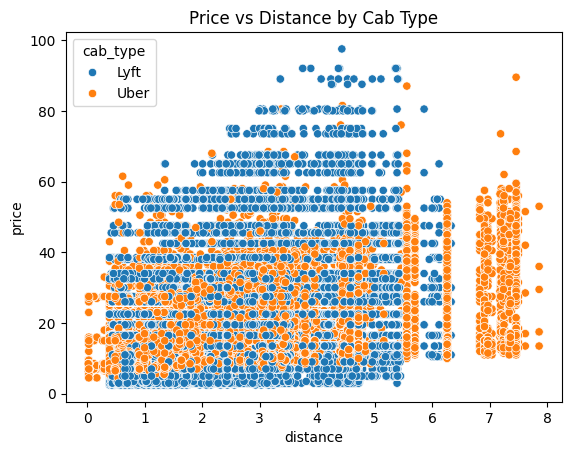

In [16]:
sns.scatterplot(x='distance', y='price', hue='cab_type', data=df)
plt.title('Price vs Distance by Cab Type')
plt.show()

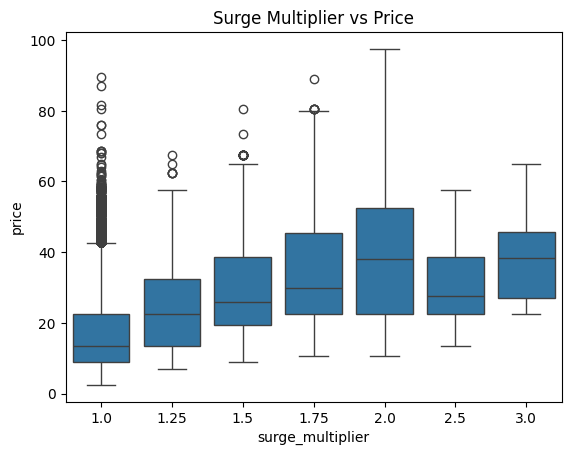

In [18]:
sns.boxplot(x='surge_multiplier', y='price', data=df)
plt.title('Surge Multiplier vs Price')
plt.show()

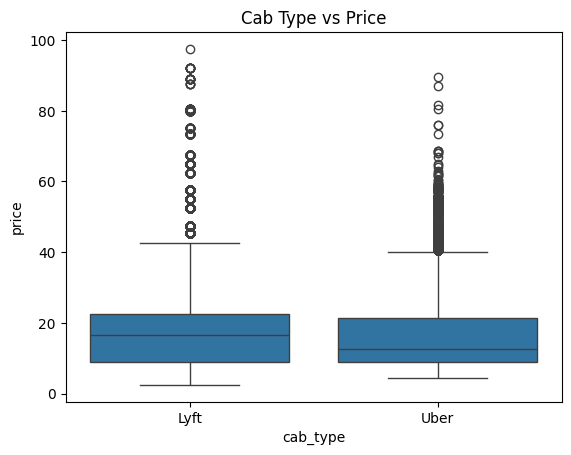

In [19]:
sns.boxplot(data=df, x='cab_type', y='price')
plt.title('Cab Type vs Price')
plt.show()

In [26]:
# Insightful Questions
df['cab_type'].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

In [27]:
df.groupby('cab_type')['price'].mean().sort_values()

cab_type
Uber    15.795343
Lyft    17.351396
Name: price, dtype: float64

In [28]:
df['hour'].value_counts().sort_index()

hour
0    693071
Name: count, dtype: int64

In [31]:
# Most common pickup and drop locationns
df['source'].value_counts().head(5)
df['destination'].value_counts().head(5)

destination
Financial District    58851
Theatre District      57798
Back Bay              57780
Haymarket Square      57764
Boston University     57764
Name: count, dtype: int64

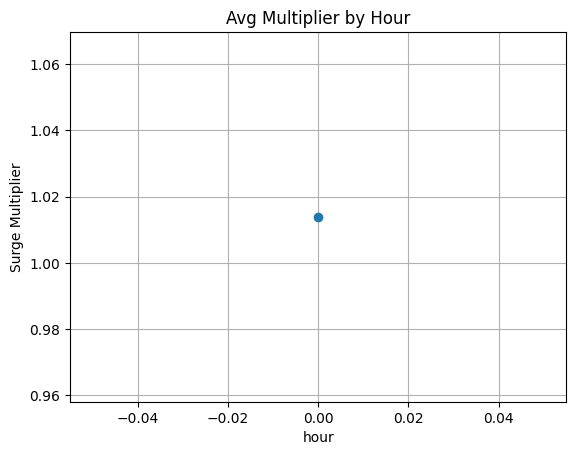

In [32]:
# Surge Pricing by hour
surge_hourly = df.groupby('hour')['surge_multiplier'].mean()
surge_hourly.plot(kind='line', marker='o', title='Avg Multiplier by Hour')
plt.ylabel('Surge Multiplier')
plt.grid()
plt.show()

In [33]:
# Most Expensive rides
df[['price', 'cab_type', 'distance']].sort_values(by='price', ascending = False).head()

,price,cab_type,distance
597071,97.5,Lyft,4.43
28083,92.0,Lyft,3.89
560058,92.0,Lyft,4.37
537453,92.0,Lyft,4.39
515785,92.0,Lyft,3.75


In [34]:
# Longest Distance rides
df[['distance', 'source', 'destination']].sort_values(by='distance', ascending=False).head(5)

,distance,source,destination
658728,7.86,Northeastern University,Financial District
658725,7.86,Northeastern University,Financial District
658726,7.86,Northeastern University,Financial District
658727,7.86,Northeastern University,Financial District
658729,7.86,Northeastern University,Financial District


In [35]:
# Correlation between distance & price
df[['distance', 'price']].corr()

,distance,price
distance,1.000000,0.345061
price,0.345061,1.000000


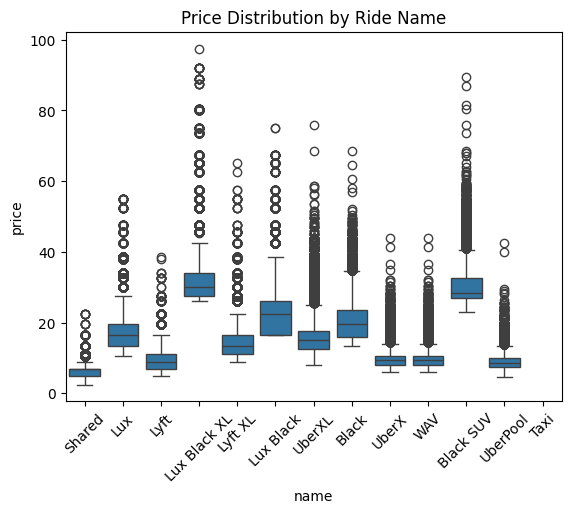

In [36]:
# Price range by ride type (name)
sns.boxplot(x='name', y='price', data=df)
plt.title('Price Distribution by Ride Name')
plt.xticks(rotation=45)
plt.show()

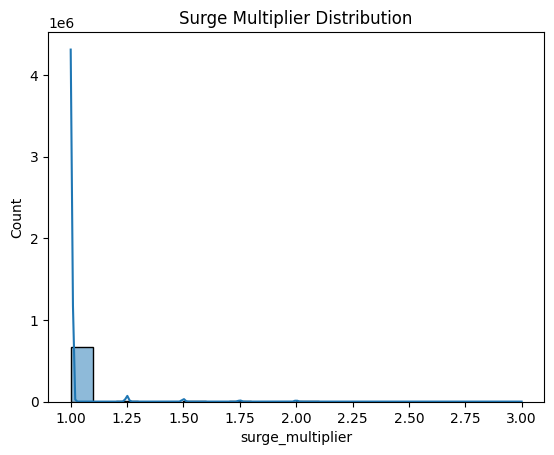

In [37]:
# Distribution of Surge multipliers
sns.histplot(df['surge_multiplier'], bins=20, kde=True)
plt.title('Surge Multiplier Distribution')
plt.show()

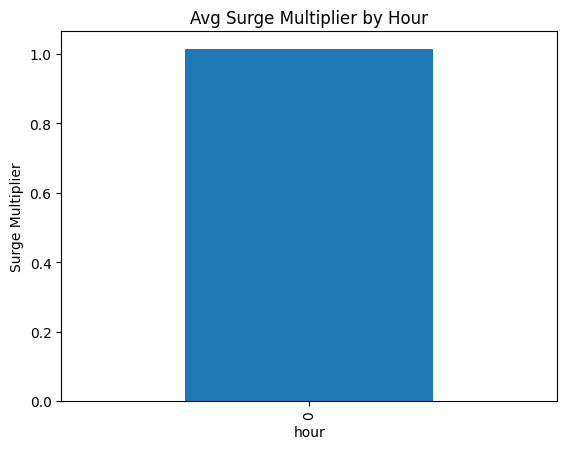

In [22]:
surge_by_hour = df.groupby('hour')['surge_multiplier'].mean()
surge_by_hour.plot(kind='bar', title='Avg Surge Multiplier by Hour')
plt.ylabel('Surge Multiplier')
plt.show()

In [23]:
df[['distance', 'source', 'destination']].sort_values(by='distance', ascending=False).head()
df[['price', 'cab_type', 'distance']].sort_values(by='price', ascending=False).head()
df.groupby('cab_type')['surge_multiplier'].mean()

cab_type
Lyft    1.03127
Uber    1.00000
Name: surge_multiplier, dtype: float64

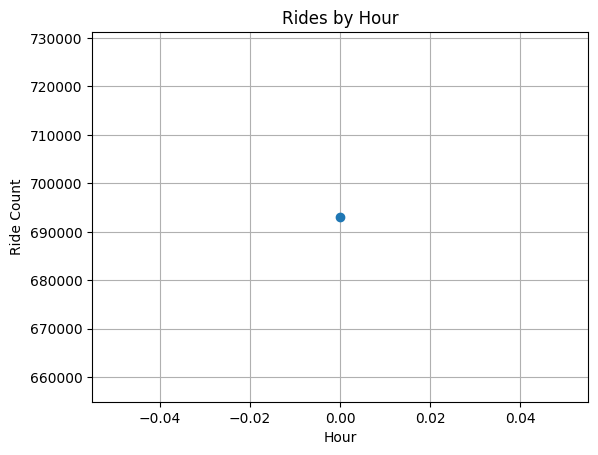

In [38]:
hourly = df['hour'].value_counts().sort_index()
plt.plot(hourly.index, hourly.values, marker='o')
plt.title("Rides by Hour")
plt.xlabel('Hour')
plt.ylabel('Ride Count')
plt.grid(True)
plt.show()

In [40]:
# Time Feature Engineering
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df['hour'] = df['time_stamp'].dt.hour
df['day'] = df['time_stamp'].dt.day_name()
df['month'] = df['time_stamp'].dt.month_name()
df['week'] = df['time_stamp'].dt.isocalendar().week
df['weekday'] = df['time_stamp'].dt.weekday
df['date'] = df['time_stamp'].dt.date

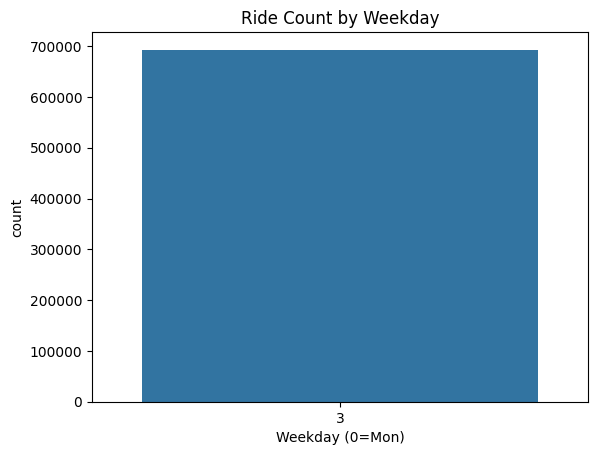

In [41]:
sns.countplot(x='weekday', data=df)
plt.title('Ride Count by Weekday')
plt.xlabel('Weekday (0=Mon)')
plt.show()

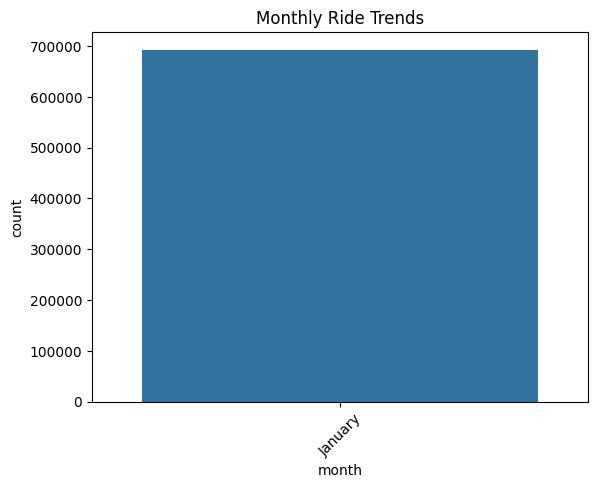

In [42]:
sns.countplot(x='month', data=df, order=sorted(df['month'].unique()))
plt.title('Monthly Ride Trends')
plt.xticks(rotation=45)
plt.show()

In [43]:
df['surge_multiplier'].describe()

count    693071.000000
mean          1.013870
std           0.091641
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: surge_multiplier, dtype: float64

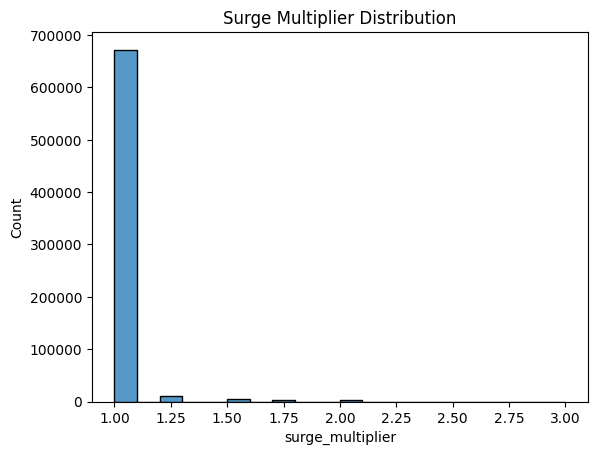

In [44]:
sns.histplot(df['surge_multiplier'], bins=20)
plt.title('Surge Multiplier Distribution')
plt.show()

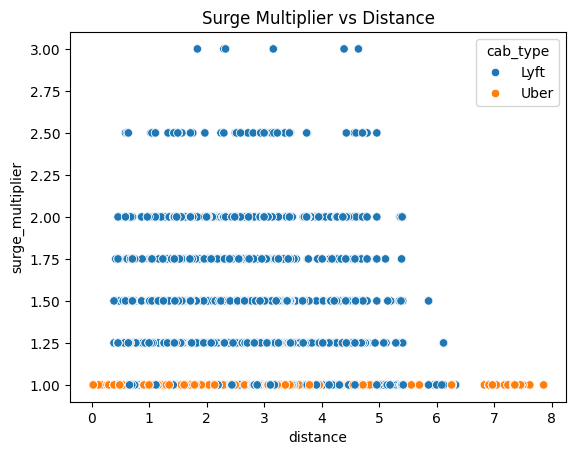

In [45]:
# Correlation between distance & surge multiplier
sns.scatterplot(x='distance', y='surge_multiplier', hue='cab_type', data=df)
plt.title('Surge Multiplier vs Distance')
plt.show()

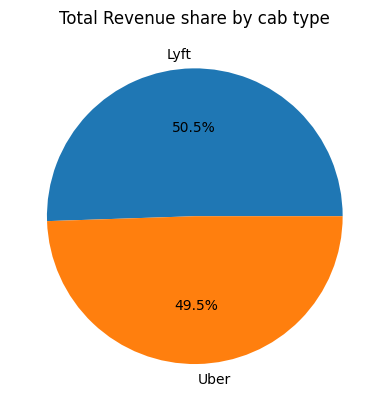

In [46]:
revenue = df.groupby('cab_type')['price'].sum().reset_index().sort_values(by='price', ascending = False)
plt.pie(revenue['price'], labels=revenue['cab_type'], autopct='%1.1f%%')
plt.title('Total Revenue share by cab type')
plt.show()

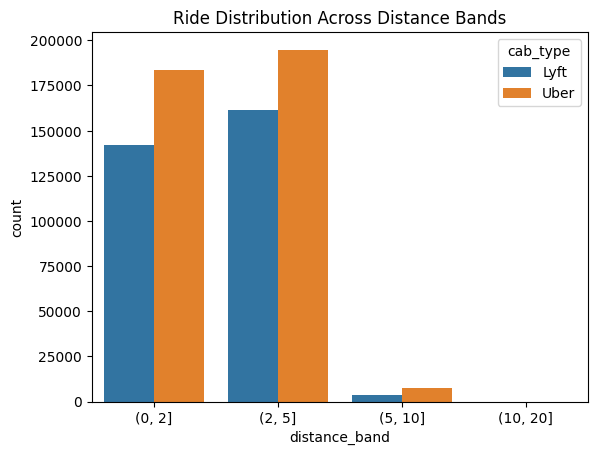

In [47]:
# Distance and Distribution
bins = [0,2,5,10,20]
df['distance_band'] = pd.cut(df['distance'], bins)
sns.countplot(data=df, x='distance_band', hue='cab_type')
plt.title('Ride Distribution Across Distance Bands')
plt.show()

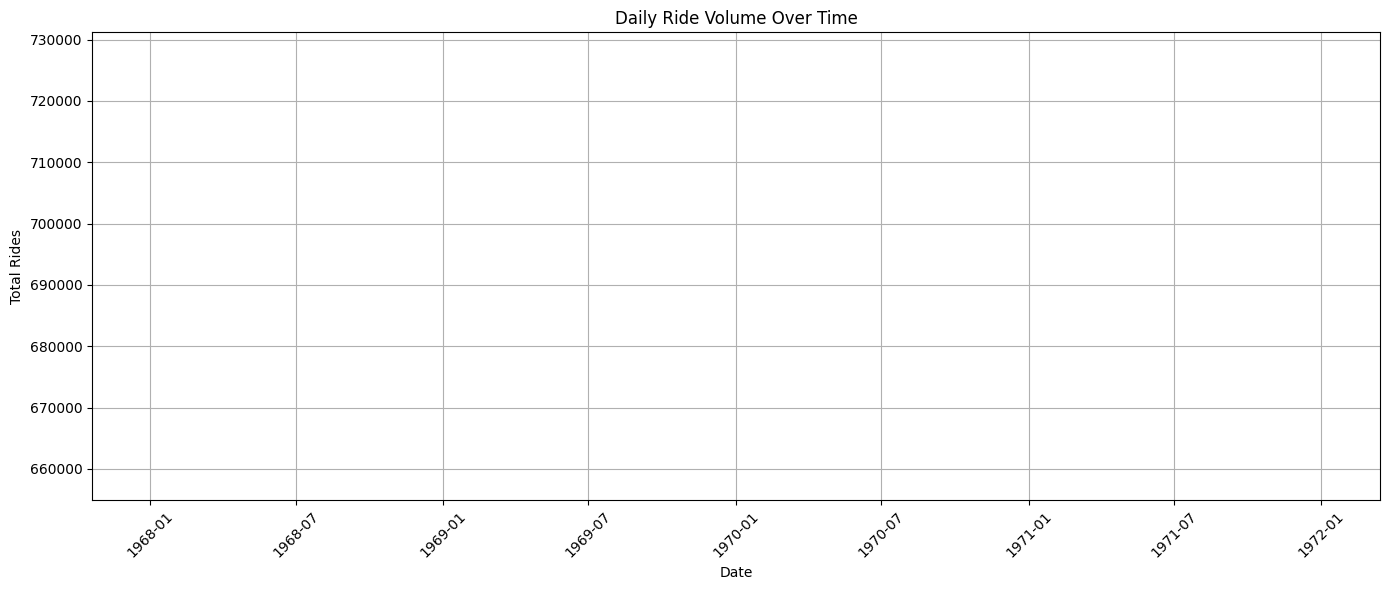

In [48]:
# Daily ride volume trend
daily_trend = df.groupby('date').size().reset_index(name='rides')
plt.figure(figsize=(14,6))
plt.plot(daily_trend['date'], daily_trend['rides'])
plt.title('Daily Ride Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

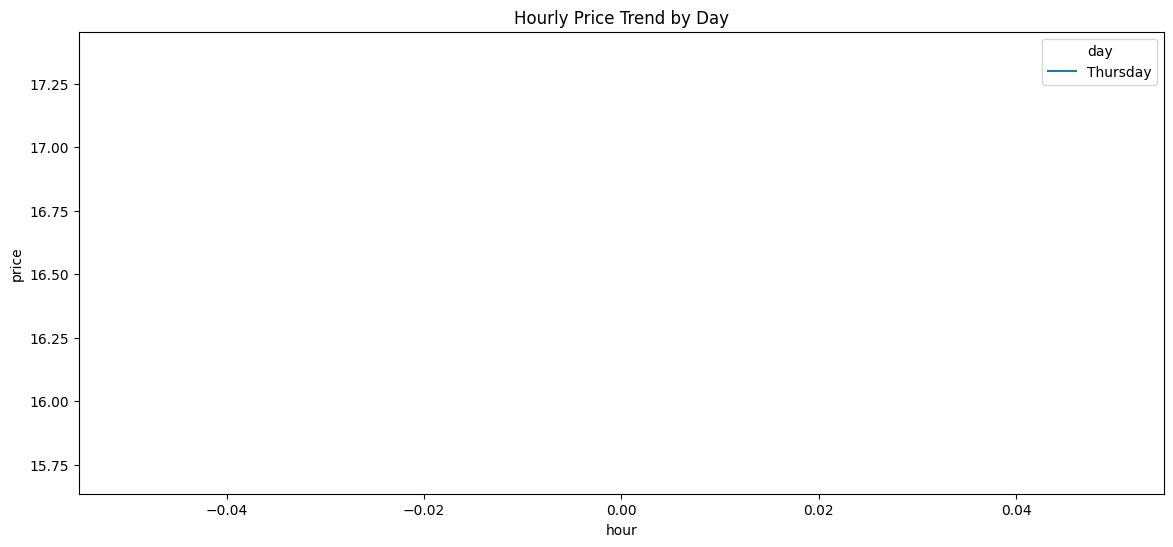

In [51]:
# Time-based trend
trend_df = df.groupby(['day', 'hour'])['price'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=trend_df, x='hour', y='price', hue='day')
plt.title("Hourly Price Trend by Day")
plt.show()
